# Auto regressive

In [ ]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
N=1000
series = np.sin(0.1*np.arange(N)) # + np.random.rand(N)*0.1

plt.plot(series)
plt.show()

In [ ]:
T=10
X=[]
y=[]
for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[T+t])


X=torch.Tensor(X)
y=torch.Tensor(y)
X=X.view(-1,T)
y=y.view(-1,1)
print(len(X))
print('X.shape' , X.shape , 'y.shape', y.shape)

In [ ]:
model = nn.Linear(T,1)

In [ ]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [ ]:
X_train=X[:N//2]
X_test=X[N//2:]
y_train=y[:N//2]
y_test=y[N//2:]

In [ ]:
n_epochs = 200
train_loss=[]
test_loss=[]
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  train_outputs=model(X_train)
  error = Loss(train_outputs,y_train)
  error.backward()
  optimizer.step()
  train_loss.append(error.item())
  test_outputs = model(X_test)
  test_error = Loss(test_outputs,y_test)
  test_loss.append(test_error.item())
  if i % 5 == 0 :
    print(f'Epoch {i}/{n_epochs} | Train Loss:{train_loss[i]:.2f} | Test Loss:{test_loss[i]:.2f}')

Epoch 0/200 | Train Loss:0.11 | Test Loss:0.17
Epoch 5/200 | Train Loss:0.07 | Test Loss:0.02
Epoch 10/200 | Train Loss:0.02 | Test Loss:0.00
Epoch 15/200 | Train Loss:0.01 | Test Loss:0.01
Epoch 20/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 25/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 30/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 35/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 40/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 45/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 50/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 55/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 60/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 65/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 70/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 75/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 80/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 85/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 90/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 95/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 100/200 | Train Loss:0.00 | Test Los

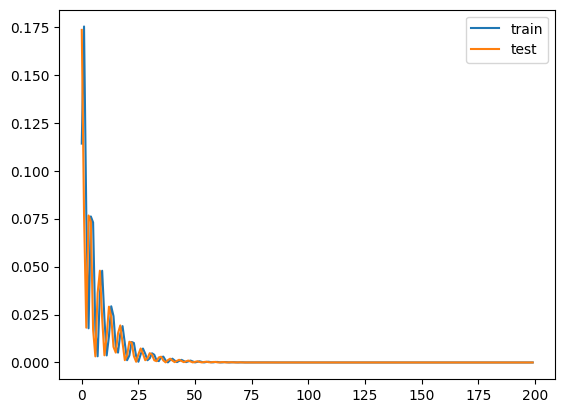

In [ ]:
plt.plot(train_loss,label='train')
plt.plot(test_loss,label='test')
plt.legend()
plt.show()

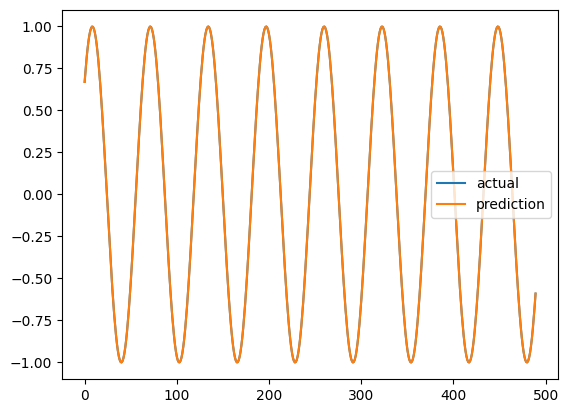

In [ ]:
# wrong forcast method use true target 
validation_predictons = []
i=0
while len(validation_predictons) < len(y_test):
  input_=X_test[i].view(1,-1)
  output = model(input_)[0].item()
  i+=1
  validation_predictons.append(output)

plt.plot(y_test,label='actual')
plt.plot(validation_predictons,label='prediction')
plt.legend()
plt.show()

In [ ]:
#True Way of Prediction
validation_predictons = []
last_x = X_test[0]
i=0
while len(validation_predictons) < len(y_test):
  input_ = last_x.view(1,-1)
  output = model(input_)
  print()
  i+=1
  validation_predictons.append(output[0].item())
  last_x = torch.cat((last_x[1:],output[0]))
plt.plot(y_test,label='actual')
plt.plot(validation_predictons,label='prediction')
plt.legend()
plt.show()

# pytorch simpleRNN sin

In [ ]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt

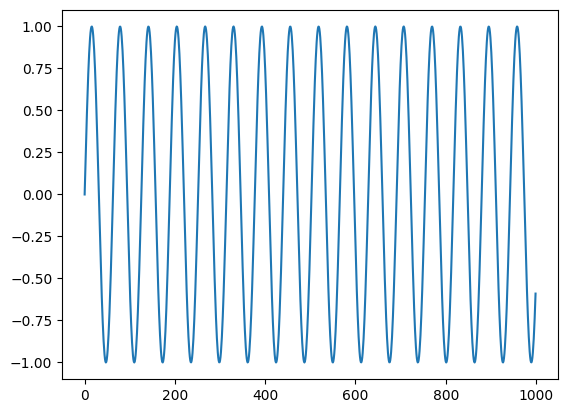

In [ ]:
N=1000
series = np.sin(0.1*np.arange(N)) #+ np.random.randn(N)*0.1

plt.plot(series)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
y=np.array(Y).reshape(-1,1)
print(len(X))
print('X shape :',X.shape,'\n','y shape :',y.shape)

990
X shape : (990, 10, 1) 
 y shape : (990, 1)


In [ ]:
class simpleRNN(nn.Module):
  def __init__(self,n_input,n_hiddens,n_rnnlayers,n_output):
    super(simpleRNN,self).__init__()
    self.D=n_input
    self.M=n_hiddens
    self.K=n_output
    self.L=n_rnnlayers
    self.rnn = nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity='relu',
        batch_first=True
    )
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    output,_=self.rnn(X,h0)
    return self.fc(output[:,-1,:])

In [ ]:
model=simpleRNN(1,5,1,1)
model.to(device)

simpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [ ]:
X_train=torch.from_numpy(X[:N//2].astype(np.float32)).to(device)
X_test=torch.from_numpy(X[N//2:].astype(np.float32)).to(device)
y_train=torch.from_numpy(y[:N//2].astype(np.float32)).to(device)
y_test=torch.from_numpy(y[N//2:].astype(np.float32)).to(device)
X_train.shape

torch.Size([500, 10, 1])

In [ ]:
n_epochs = 200
train_loss=[]
test_loss=[]
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  train_outputs=model(X_train)
  error = Loss(train_outputs,y_train)
  error.backward()
  optimizer.step()
  train_loss.append(error.item())
  test_outputs = model(X_test)
  test_error = Loss(test_outputs,y_test)
  test_loss.append(test_error.item())
  if i % 5 == 0 :
    print(f'Epoch {i}/{n_epochs} | Train Loss:{train_loss[i]:.2f} | Test Loss:{test_loss[i]:.2f}')

Epoch 0/200 | Train Loss:0.80 | Test Loss:0.52
Epoch 5/200 | Train Loss:0.16 | Test Loss:0.10
Epoch 10/200 | Train Loss:0.02 | Test Loss:0.03
Epoch 15/200 | Train Loss:0.02 | Test Loss:0.02
Epoch 20/200 | Train Loss:0.01 | Test Loss:0.01
Epoch 25/200 | Train Loss:0.01 | Test Loss:0.01
Epoch 30/200 | Train Loss:0.01 | Test Loss:0.01
Epoch 35/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 40/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 45/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 50/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 55/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 60/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 65/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 70/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 75/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 80/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 85/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 90/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 95/200 | Train Loss:0.00 | Test Loss:0.00
Epoch 100/200 | Train Loss:0.00 | Test Los

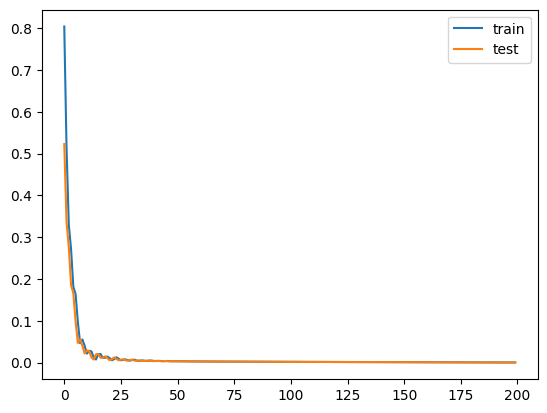

In [ ]:
plt.plot(train_loss,label='train')
plt.plot(test_loss,label='test')
plt.legend()
plt.show()

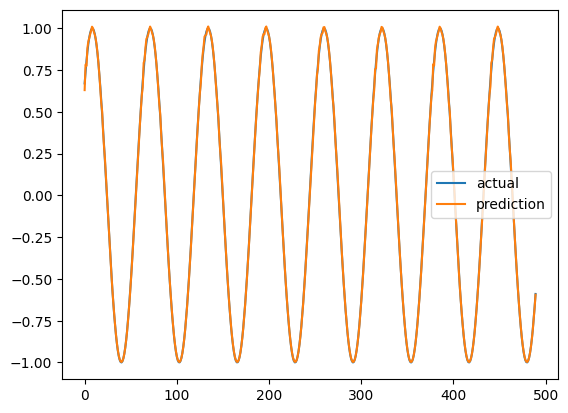

In [ ]:
# wrong predection way
predictions = []
i=0
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    x=X_test[i].view(1,T,1)
    output=model(x)
    predictions.append(output[0,0].item())
    i+=1

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

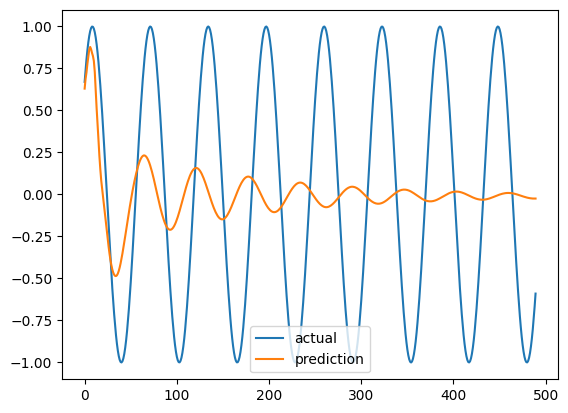

In [ ]:
# correct prediction way
predictions = []
last_X=X_test[0].view(T)
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    input=last_X.view(1,T,1)
    output=model(input)
    predictions.append(output[0,0].item())
    last_X = torch.cat((last_X[1:],output[0]))
  

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

# non-linear squence with Auto regressive

In [ ]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series = np.sin((0.1*np.arange(400))**2)

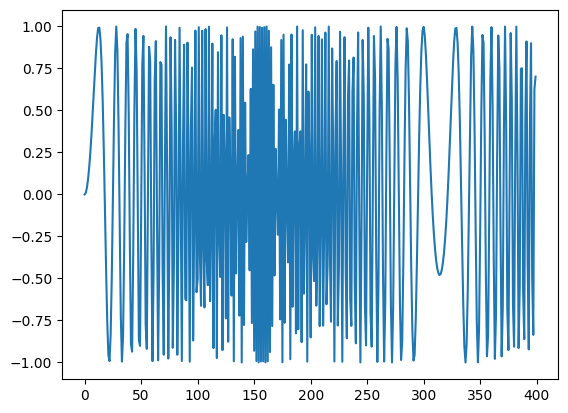

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T=10
X=[]
y=[]
for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[T+t])


X=torch.Tensor(X)
y=torch.Tensor(y)
X=X.view(-1,T)
y=y.view(-1,1)
N=len(X)
print('X.shape' , X.shape , 'y.shape', y.shape)

X.shape torch.Size([390, 10]) y.shape torch.Size([390, 1])


In [ ]:
model = nn.Linear(T,1)

In [ ]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [ ]:
X_train=X[:N//2]
X_test=X[N//2:]
y_train=y[:N//2]
y_test=y[N//2:]

In [ ]:
n_epochs = 200
train_loss=[]
test_loss=[]
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  train_outputs=model(X_train)
  error = Loss(train_outputs,y_train)
  error.backward()
  optimizer.step()
  train_loss.append(error.item())
  test_outputs = model(X_test)
  test_error = Loss(test_outputs,y_test)
  test_loss.append(test_error.item())
  if i % 5 == 0 :
    print(f'Epoch {i}/{n_epochs} | Train Loss:{train_loss[i]:.2f} | Test Loss:{test_loss[i]:.2f}')

Epoch 0/200 | Train Loss:0.58 | Test Loss:0.59
Epoch 5/200 | Train Loss:0.51 | Test Loss:0.70
Epoch 10/200 | Train Loss:0.49 | Test Loss:0.56
Epoch 15/200 | Train Loss:0.49 | Test Loss:0.59
Epoch 20/200 | Train Loss:0.49 | Test Loss:0.62
Epoch 25/200 | Train Loss:0.49 | Test Loss:0.58
Epoch 30/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 35/200 | Train Loss:0.48 | Test Loss:0.60
Epoch 40/200 | Train Loss:0.48 | Test Loss:0.58
Epoch 45/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 50/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 55/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 60/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 65/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 70/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 75/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 80/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 85/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 90/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 95/200 | Train Loss:0.48 | Test Loss:0.59
Epoch 100/200 | Train Loss:0.48 | Test Los

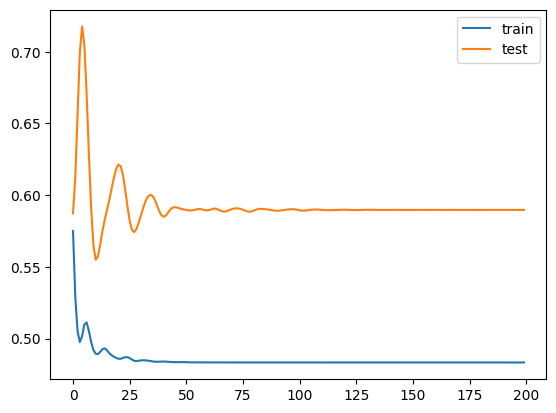

In [ ]:
plt.plot(train_loss,label='train')
plt.plot(test_loss,label='test')
plt.legend()
plt.show()
#overfit!!

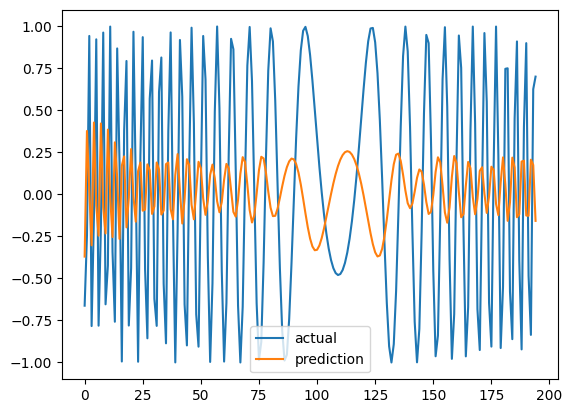

In [ ]:
# wrong predection way
predictions = []
i=0
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    x=X_test[i].view(1,T)
    output=model(x)
    predictions.append(output[0,0].item())
    i+=1

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

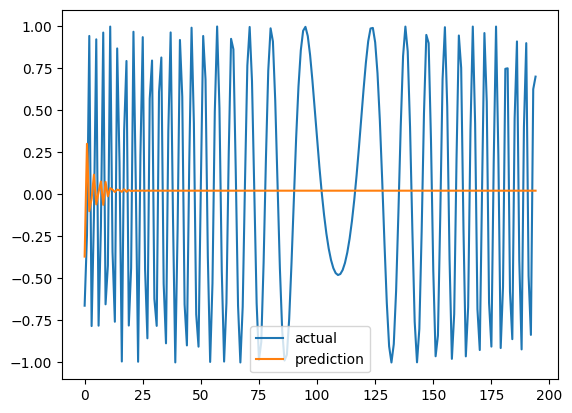

In [ ]:
# correct prediction way
predictions = []
last_X=X_test[0].view(T)
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    input=last_X.view(1,T)
    output=model(input)
    predictions.append(output[0,0].item())
    last_X = torch.cat((last_X[1:],output[0]))
  

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

# non linear squence with RNN

In [ ]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series = np.sin((0.1*np.arange(400))**2)

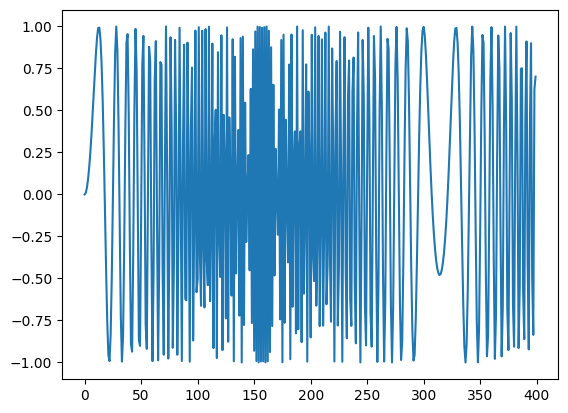

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
y=np.array(Y).reshape(-1,1)
print(len(X))
print('X shape :',X.shape,'\n','y shape :',y.shape)

390
X shape : (390, 10, 1) 
 y shape : (390, 1)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class RNN(nn.Module):
  def __init__(self,n_input,n_hiddens,n_rnnlayers,n_output):
    super(RNN,self).__init__()
    self.D=n_input
    self.M=n_hiddens
    self.K=n_output
    self.L=n_rnnlayers
    self.rnn = nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity='relu',
        batch_first=True
    )
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    output,_=self.rnn(X,h0)
    return self.fc(output[:,-1,:])

In [ ]:
model=RNN(1,10,2,1)
model.to(device)

simpleRNN(
  (rnn): RNN(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.05)

In [ ]:
X_train=torch.from_numpy(X[:N//2].astype(np.float32)).to(device)
X_test=torch.from_numpy(X[N//2:].astype(np.float32)).to(device)
y_train=torch.from_numpy(y[:N//2].astype(np.float32)).to(device)
y_test=torch.from_numpy(y[N//2:].astype(np.float32)).to(device)
X_train.shape

torch.Size([195, 10, 1])

In [ ]:
n_epochs = 200
train_loss=[]
test_loss=[]
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  train_outputs=model(X_train)
  error = Loss(train_outputs,y_train)
  error.backward()
  optimizer.step()
  train_loss.append(error.item())
  test_outputs = model(X_test)
  test_error = Loss(test_outputs,y_test)
  test_loss.append(test_error.item())
  if i % 5 == 0 :
    print(f'Epoch {i}/{n_epochs} | Train Loss:{train_loss[i]:.2f} | Test Loss:{test_loss[i]:.2f}')

Epoch 0/200 | Train Loss:0.57 | Test Loss:0.83
Epoch 5/200 | Train Loss:0.54 | Test Loss:0.55
Epoch 10/200 | Train Loss:0.50 | Test Loss:0.60
Epoch 15/200 | Train Loss:0.48 | Test Loss:0.54
Epoch 20/200 | Train Loss:0.45 | Test Loss:0.57
Epoch 25/200 | Train Loss:0.41 | Test Loss:0.53
Epoch 30/200 | Train Loss:0.37 | Test Loss:0.45
Epoch 35/200 | Train Loss:0.28 | Test Loss:0.29
Epoch 40/200 | Train Loss:0.15 | Test Loss:0.20
Epoch 45/200 | Train Loss:0.14 | Test Loss:0.14
Epoch 50/200 | Train Loss:0.09 | Test Loss:0.11
Epoch 55/200 | Train Loss:0.07 | Test Loss:0.12
Epoch 60/200 | Train Loss:0.06 | Test Loss:0.10
Epoch 65/200 | Train Loss:0.05 | Test Loss:0.08
Epoch 70/200 | Train Loss:0.04 | Test Loss:0.08
Epoch 75/200 | Train Loss:0.03 | Test Loss:0.07
Epoch 80/200 | Train Loss:0.03 | Test Loss:0.07
Epoch 85/200 | Train Loss:0.02 | Test Loss:0.07
Epoch 90/200 | Train Loss:0.02 | Test Loss:0.07
Epoch 95/200 | Train Loss:0.02 | Test Loss:0.07
Epoch 100/200 | Train Loss:0.02 | Test Los

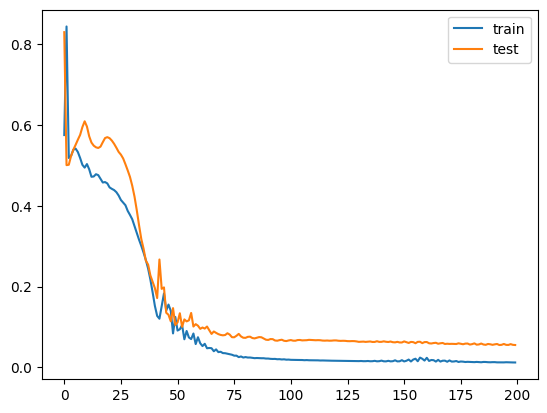

In [ ]:
plt.plot(train_loss,label='train')
plt.plot(test_loss,label='test')
plt.legend()
plt.show()

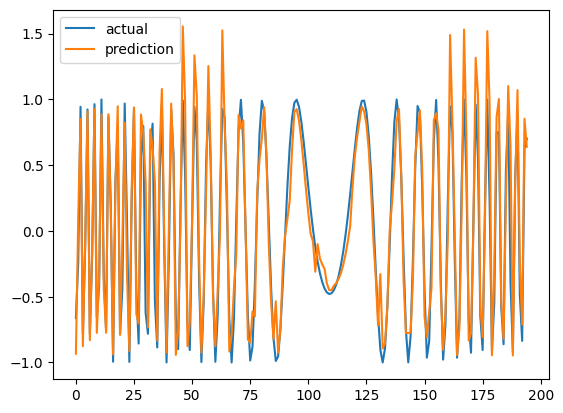

In [ ]:
# wrong predection way
predictions = []
i=0
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    x=X_test[i].view(1,T,1)
    output=model(x)
    predictions.append(output[0,0].item())
    i+=1

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

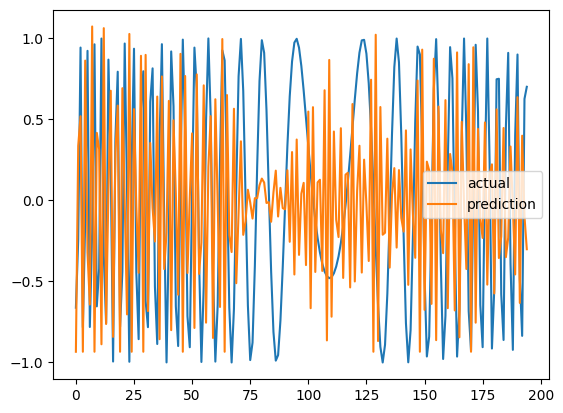

In [ ]:
# correct prediction way
predictions = []
last_X=X_test[0].view(T)
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    input=last_X.view(1,T,1)
    output=model(input)
    predictions.append(output[0,0].item())
    last_X = torch.cat((last_X[1:],output[0]))
  

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

# non linear squence with LSTM

In [ ]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series = np.sin((0.1*np.arange(400))**2)

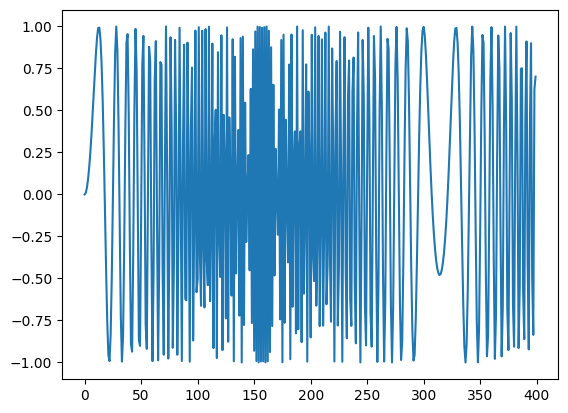

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
y=np.array(Y).reshape(-1,1)
print(len(X))
print('X shape :',X.shape,'\n','y shape :',y.shape)

390
X shape : (390, 10, 1) 
 y shape : (390, 1)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class LSTM(nn.Module):
  def __init__(self,n_input,n_hiddens,n_rnnlayers,n_output):
    super(LSTM,self).__init__()
    self.D=n_input
    self.M=n_hiddens
    self.K=n_output
    self.L=n_rnnlayers
    self.lstm = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True
    )
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    c0=torch.zeros(self.L,X.size(0),self.M).to(device)
    output,_=self.lstm(X,(h0,c0))
    return self.fc(output[:,-1,:])

In [ ]:
model=LSTM(1,10,2,1)
model.to(device)

LSTM(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.05)

In [ ]:
X_train=torch.from_numpy(X[:N//2].astype(np.float32)).to(device)
X_test=torch.from_numpy(X[N//2:].astype(np.float32)).to(device)
y_train=torch.from_numpy(y[:N//2].astype(np.float32)).to(device)
y_test=torch.from_numpy(y[N//2:].astype(np.float32)).to(device)

In [ ]:
n_epochs = 200
train_loss=[]
test_loss=[]
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  train_outputs=model(X_train)
  error = Loss(train_outputs,y_train)
  error.backward()
  optimizer.step()
  train_loss.append(error.item())
  test_outputs = model(X_test)
  test_error = Loss(test_outputs,y_test)
  test_loss.append(test_error.item())
  if i % 5 == 0 :
    print(f'Epoch {i}/{n_epochs} | Train Loss:{train_loss[i]:.2f} | Test Loss:{test_loss[i]:.2f}')

Epoch 0/200 | Train Loss:0.74 | Test Loss:0.49
Epoch 5/200 | Train Loss:0.53 | Test Loss:0.47
Epoch 10/200 | Train Loss:0.52 | Test Loss:0.48
Epoch 15/200 | Train Loss:0.46 | Test Loss:0.48
Epoch 20/200 | Train Loss:0.38 | Test Loss:0.61
Epoch 25/200 | Train Loss:0.38 | Test Loss:0.51
Epoch 30/200 | Train Loss:0.33 | Test Loss:0.40
Epoch 35/200 | Train Loss:0.22 | Test Loss:0.42
Epoch 40/200 | Train Loss:0.12 | Test Loss:0.34
Epoch 45/200 | Train Loss:0.05 | Test Loss:0.26
Epoch 50/200 | Train Loss:0.03 | Test Loss:0.18
Epoch 55/200 | Train Loss:0.02 | Test Loss:0.18
Epoch 60/200 | Train Loss:0.01 | Test Loss:0.15
Epoch 65/200 | Train Loss:0.01 | Test Loss:0.15
Epoch 70/200 | Train Loss:0.01 | Test Loss:0.14
Epoch 75/200 | Train Loss:0.01 | Test Loss:0.13
Epoch 80/200 | Train Loss:0.01 | Test Loss:0.12
Epoch 85/200 | Train Loss:0.01 | Test Loss:0.12
Epoch 90/200 | Train Loss:0.00 | Test Loss:0.12
Epoch 95/200 | Train Loss:0.00 | Test Loss:0.11
Epoch 100/200 | Train Loss:0.00 | Test Los

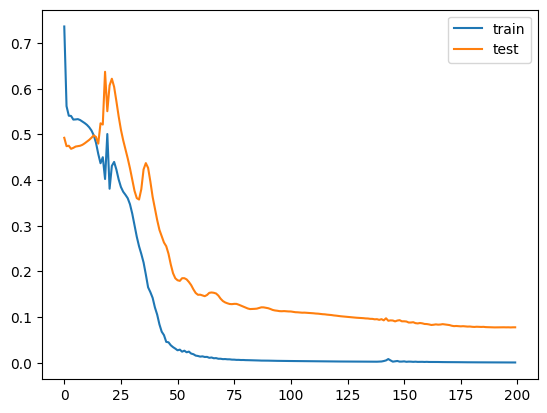

In [ ]:
plt.plot(train_loss,label='train')
plt.plot(test_loss,label='test')
plt.legend()
plt.show()

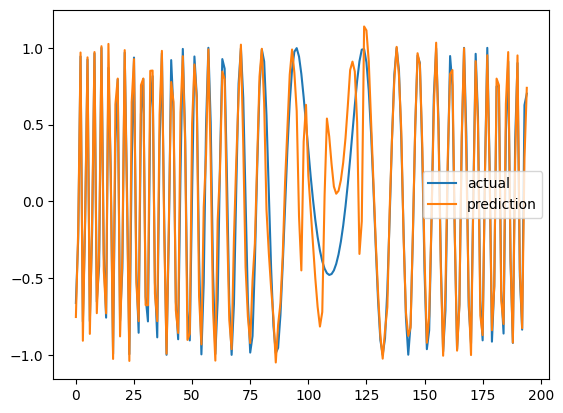

In [ ]:
# wrong predection way
predictions = []
i=0
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    x=X_test[i].view(1,T,1)
    output=model(x)
    predictions.append(output[0,0].item())
    i+=1

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

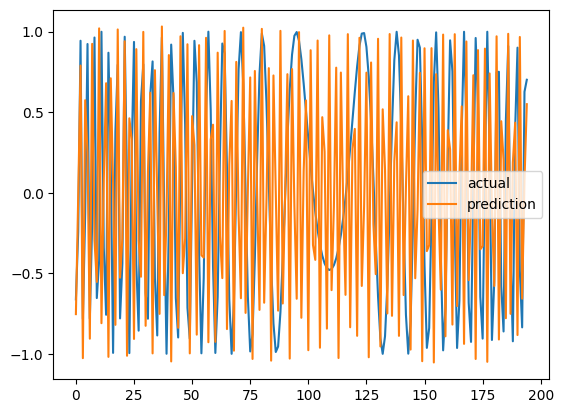

In [ ]:
# correct prediction way
predictions = []
last_X=X_test[0].view(T)
while len(predictions) < len(y_test):
  with torch.inference_mode():
    model.eval()
    input=last_X.view(1,T,1)
    output=model(input)
    predictions.append(output[0,0].item())
    last_X = torch.cat((last_X[1:],output[0]))
  

plt.plot(y_test.cpu().numpy(),label='actual')
plt.plot(predictions,label='prediction')
plt.legend()
plt.show()

# MINST dataset with RNN

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
train_dataset = torchvision.datasets.MNIST(train=True,
                                                  root='.',
                                                  download=True,
                                                  transform=transforms.ToTensor()
                                                  )

100%|██████████| 9912422/9912422 [00:00<00:00, 91361334.75it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38615139.89it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27821480.31it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13530205.09it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train=train_dataset.data
y_train=train_dataset.targets

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    download=True,
    root='.',
    train=False,
    transform = transforms.ToTensor()
)

In [ ]:
X_test=test_dataset.data
y_test=test_dataset.targets

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class RNN(nn.Module):
  def __init__(self,n_input,n_hiddens,n_rnnlayers,n_output):
    super(RNN,self).__init__()
    self.D=n_input
    self.M=n_hiddens
    self.K=n_output
    self.L=n_rnnlayers
    self.rnn = nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity='relu',
        batch_first=True
    )
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    h0=torch.zeros(self.L,X.size(0),self.M).to(device)
    output,_=self.rnn(X,h0)
    return self.fc(output[:,-1,:])

In [ ]:
model=RNN(28,128,2,10)
model.to(device)

RNN(
  (rnn): RNN(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
batch_size = 128
Train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           shuffle=True,
                                           batch_size=batch_size)

Test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           shuffle=False,
                                           batch_size=batch_size)

In [ ]:
n_epoch=9
train_losses=torch.zeros(n_epoch)
test_losses=torch.zeros(n_epoch)
for it in range(n_epoch):
  model.train()
  t0=datetime.now()
  train_loss=[]
  for input,target in Train_loader:
    input,target=input.to(device) , target.to(device)
    input = input.view(-1,28,28)
    optimizer.zero_grad()
    outputs=model(input)
    error=loss_fn(outputs,target)
    error.backward()
    optimizer.step()
    train_loss.append(error.item())
  train_losses[it]=np.mean(train_loss)
  test_loss=[]
  for input,target in Test_loader:
    input,target=input.to(device) , target.to(device)
    input= input.view(-1,28,28)
    outputs=model(input)
    error=loss_fn(outputs,target)
    test_loss.append(error.item())
  test_losses[it]=np.mean(test_loss)
  dt=datetime.now()-t0
  print(f'Epoch {it+1}/{n_epoch} | Train Loss:{train_losses[it]:.2f} | Test Loss:{test_losses[it]:.2f} | Duration:{dt}')

Epoch 1/9 | Train Loss:0.74 | Test Loss:0.29 | Duration:0:00:10.073929
Epoch 2/9 | Train Loss:0.23 | Test Loss:0.16 | Duration:0:00:09.894478
Epoch 3/9 | Train Loss:0.15 | Test Loss:0.16 | Duration:0:00:13.643989
Epoch 4/9 | Train Loss:0.12 | Test Loss:0.10 | Duration:0:00:14.779980
Epoch 5/9 | Train Loss:0.10 | Test Loss:0.10 | Duration:0:00:10.071573
Epoch 6/9 | Train Loss:0.09 | Test Loss:0.09 | Duration:0:00:21.303414
Epoch 7/9 | Train Loss:0.08 | Test Loss:0.08 | Duration:0:00:19.681176
Epoch 8/9 | Train Loss:0.08 | Test Loss:0.07 | Duration:0:00:17.241893
Epoch 9/9 | Train Loss:0.07 | Test Loss:0.06 | Duration:0:00:17.224953


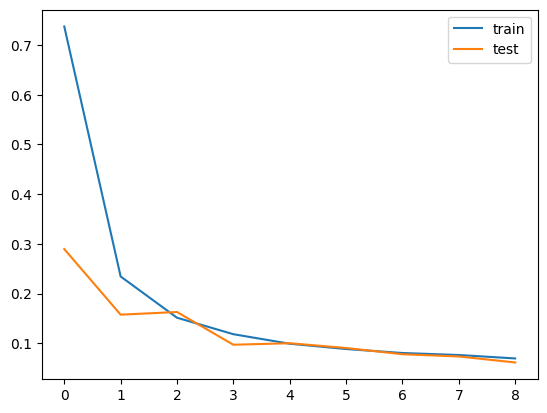

In [ ]:
plt.plot(train_losses,label='train')
plt.plot(test_losses,label='test')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.inference_mode():
  n_correct=0
  n_total=0
  for inputs,targets in Train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,28,28)
    outputs = model(inputs)
    _,predection = torch.max(outputs,1)
    n_correct+=(predection == targets).sum().item()
    n_total+=targets.shape[0]
  train_acc = n_correct/n_total
print(train_acc)

0.9819333333333333


In [ ]:
model.eval()
with torch.inference_mode():
  n_correct=0
  n_total=0
  for inputs,targets in Test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,28,28)
    outputs = model(inputs)
    _,predection = torch.max(outputs,1)
    n_correct+=(predection == targets).sum().item()
    n_total+=targets.shape[0]
  test_acc = n_correct/n_total
print(test_acc)

0.9822


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
y_test = test_dataset.targets.numpy()
p_test= np.array([])
for input , target in Test_loader:
  input,target = input.to(device) , target.to(device)
  input = input.view(-1,28,28)
  output = model(input)
  _,perdictions = output.max(1)
  p_test = np.concatenate((p_test,perdictions.cpu().numpy()))

[[ 969    0    0    0    0    1    8    1    1    0]
 [   0 1118    4    3    0    2    4    4    0    0]
 [   3    0 1020    4    0    0    1    4    0    0]
 [   0    1    1  999    0    5    0    1    0    3]
 [   2    0    0    0  953    0    4    1    0   22]
 [   1    1    0    9    4  868    2    0    2    5]
 [   2    1    2    0    3    2  945    0    3    0]
 [   0    0    7    2    0    0    0 1016    0    3]
 [   1    1    4    2    2    3    4    5  945    7]
 [   2    0    0    5    4    3    0    6    0  989]]


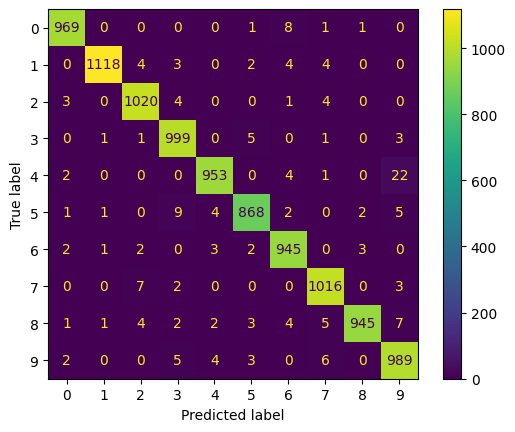

In [ ]:
cm = confusion_matrix(y_test, p_test, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()

print(cm)

In [ ]:
Labels=train_dataset.classes

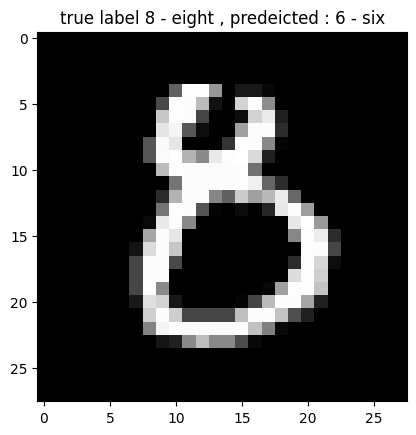

In [ ]:
x_test = X_test.cpu().numpy()
misMatch=np.where(y_test != p_test)[0]
index=np.random.choice(misMatch)
plt.imshow(x_test[index],cmap='gray')
plt.title(f'true label {Labels[y_test[index]]} , predeicted : {Labels[int(p_test[index])]}')
plt.show()